In [1]:
import pandas as pd
order_data = pd.read_csv('output_data/order_data.csv')
print(len(order_data))
order_data.head()

703886


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,지불 완료
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달 완료
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9,화중로점,GB,경기,경기북부,delivery,주문 취소
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivery,배달 완료
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivery,배달 완료


In [2]:
order_data = order_data.loc[(order_data['status'] == 1) | (order_data['status'] == 2)]
print(len(order_data))
order_data.columns

574435


Index(['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
       'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount',
       'status', 'store_name', 'area_cd', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name'],
      dtype='object')

In [3]:
analyze_data = order_data[['store_id', 'customer_id', 'coupon_cd', 'order_accept_date', 'delivered_date',
                          'total_amount', 'store_name', 'wide_area', 'narrow_area', 'takeout_name', 'status_name']]
print(analyze_data.shape)
analyze_data.head()

(574435, 11)


,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
0,11,C65806632,57,2021-04-01 11:00,2021-04-01 11:39,28270,자양로점,서울,서울,takeout,지불 완료
1,59,C09760173,37,2021-04-01 11:00,2021-04-01 11:34,28270,가마산로2점,서울,서울,delivery,배달 완료
3,127,C64119972,17,2021-04-01 11:00,2021-04-01 11:17,23080,분포로점,부산,부산,delivery,배달 완료
4,174,C10231192,18,2021-04-01 11:00,2021-04-01 11:35,46920,하남산단점,광주,광주,delivery,배달 완료
5,167,C06298599,21,2021-04-01 11:00,2021-04-01 11:59,37420,서하로점,광주,광주,takeout,지불 완료


In [4]:
analyze_data.describe()

,store_id,coupon_cd,total_amount
count,574435.000000,574435.000000,574435.000000
mean,99.113691,49.474741,29601.264965
std,55.910285,28.890069,9543.449437
min,1.000000,0.000000,6980.000000
25%,51.000000,24.000000,23080.000000
50%,99.000000,49.000000,28080.000000
75%,147.000000,75.000000,36170.000000
max,196.000000,99.000000,51000.000000


In [5]:
analyze_data.dtypes

store_id              int64
customer_id          object
coupon_cd             int64
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [6]:
analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)
analyze_data.dtypes

C:\Users\manci\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


store_id             object
customer_id          object
coupon_cd            object
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
analyze_data.describe()

,total_amount
count,574435.000000
mean,29601.264965
std,9543.449437
min,6980.000000
25%,23080.000000
50%,28080.000000
75%,36170.000000
max,51000.000000


In [9]:
analyze_data['order_accept_date'] = pd.to_datetime(analyze_data['order_accept_date'])

In [10]:
analyze_data['order_accept_month'] = analyze_data['order_accept_date'].dt.strftime('%Y%m')

In [11]:
analyze_data[['order_accept_date', 'order_accept_month']].head()

,order_accept_date,order_accept_month
0,2021-04-01 11:00:00,202104
1,2021-04-01 11:00:00,202104
3,2021-04-01 11:00:00,202104
4,2021-04-01 11:00:00,202104
5,2021-04-01 11:00:00,202104


In [12]:
analyze_data['delivered_date'] = pd.to_datetime(analyze_data['delivered_date'])

In [13]:
analyze_data['delivered_date_month'] = analyze_data['delivered_date'].dt.strftime('%Y%m')
analyze_data[['delivered_date', 'delivered_date_month']].head()

,delivered_date,delivered_date_month
0,2021-04-01 11:39:00,202104
1,2021-04-01 11:34:00,202104
3,2021-04-01 11:17:00,202104
4,2021-04-01 11:35:00,202104
5,2021-04-01 11:59:00,202104


In [14]:
analyze_data.dtypes

store_id                        object
customer_id                     object
coupon_cd                       object
order_accept_date       datetime64[ns]
delivered_date          datetime64[ns]
total_amount                     int64
store_name                      object
wide_area                       object
narrow_area                     object
takeout_name                    object
status_name                     object
order_accept_month              object
delivered_date_month            object
dtype: object

In [15]:
month_data = analyze_data.groupby('order_accept_month')
month_data.describe()

total_amount                                              \
                          count          mean          std     min      25%   
order_accept_month                                                            
202104                 189388.0  29594.948571  9541.173902  6980.0  23080.0   
202105                 195699.0  29605.344432  9550.949075  6980.0  23080.0   
202106                 189348.0  29603.366394  9538.016581  6980.0  23080.0   

                                               
                        50%      75%      max  
order_accept_month                             
202104              28080.0  35860.0  51000.0  
202105              28080.0  36170.0  51000.0  
202106              28080.0  36170.0  51000.0

In [16]:
month_data.sum()

,total_amount
order_accept_month,
202104,5604928120
202105,5793736300
202106,5605338220


<AxesSubplot:xlabel='order_accept_month'>

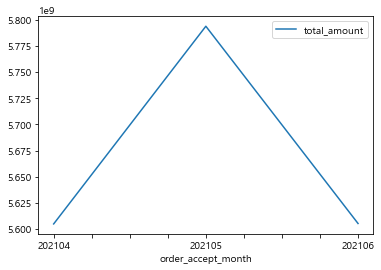

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

#한글 폰트
import os

if os.name == 'nt':
    plt.rc('font', family = 'Malgun Gothic')
elif os.name == 'posix':
    plt.rc('font', family = 'AllieGothic')

plt.rc('axes', unicode_minus = False)

month_data.sum().plot()

<AxesSubplot:xlabel='order_accept_month'>

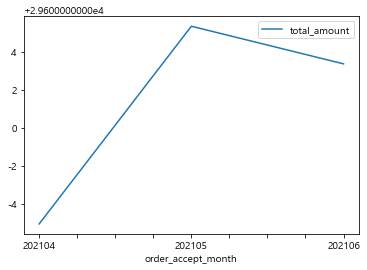

In [18]:
month_data.mean().plot()

(array([ 21523.,      0.,  48988., 135661., 111207.,  77584.,  54150.,
         59831.,  34400.,  31091.]),
 array([ 6980., 11382., 15784., 20186., 24588., 28990., 33392., 37794.,
        42196., 46598., 51000.]),
 <BarContainer object of 10 artists>)

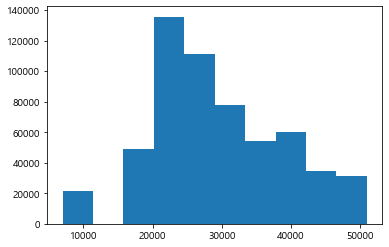

In [19]:
plt.hist(analyze_data['total_amount'])

(array([10723., 10800.,     0.,     0.,     0., 48988., 45766., 78345.,
        23174., 66450., 44344., 38738., 27635., 42501., 12512., 35282.,
        23761., 11147., 23178., 22658.,  8433.]),
 array([ 6980.        ,  9076.19047619, 11172.38095238, 13268.57142857,
        15364.76190476, 17460.95238095, 19557.14285714, 21653.33333333,
        23749.52380952, 25845.71428571, 27941.9047619 , 30038.0952381 ,
        32134.28571429, 34230.47619048, 36326.66666667, 38422.85714286,
        40519.04761905, 42615.23809524, 44711.42857143, 46807.61904762,
        48903.80952381, 51000.        ]),
 <BarContainer object of 21 artists>)

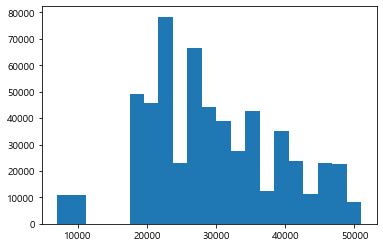

In [20]:
plt.hist(analyze_data['total_amount'], bins = 21)

In [21]:
pre_data = pd.pivot_table(analyze_data, index = 'order_accept_month',
                         columns = 'narrow_area', values = 'total_amount',
                         aggfunc = 'mean')
pre_data

narrow_area,경기남부,경기북부,광주,대전,부산,서울,세종
order_accept_month,,,,,,,
202104,29921.372816,29411.301522,29779.375703,29596.448941,29480.050738,29602.127172,29471.925249
202105,29984.839912,29486.277805,29763.962208,29524.168829,29501.991619,29633.118114,29415.088028
202106,29890.268365,29467.159844,29773.368348,29563.722047,29503.018255,29625.387817,29353.566644


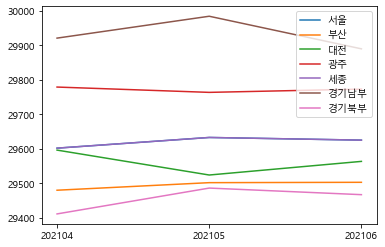

In [22]:
plt.plot(list(pre_data.index), pre_data['서울'], label = '서울')
plt.plot(list(pre_data.index), pre_data['부산'], label = '부산')
plt.plot(list(pre_data.index), pre_data['대전'], label = '대전')
plt.plot(list(pre_data.index), pre_data['광주'], label = '광주')
plt.plot(list(pre_data.index), pre_data['서울'], label = '세종')
plt.plot(list(pre_data.index), pre_data['경기남부'], label = '경기남부')
plt.plot(list(pre_data.index), pre_data['경기북부'], label = '경기북부')
plt.legend()

In [26]:
store_clustering = analyze_data.groupby('store_id').agg(['size', 'mean', 'median', 'max', 'min'])['total_amount']
store_clustering.reset_index(inplace = True, drop = True)
print(len(store_clustering))
store_clustering.head()

196


,size,mean,median,max,min
0,2879,31295.953456,30500,51000,18570
1,2290,29912.462882,27320,51000,6980
2,3776,29462.039195,28080,51000,6980
3,1743,30743.878371,28770,47440,18990
4,2758,28467.396664,27910,47440,6980


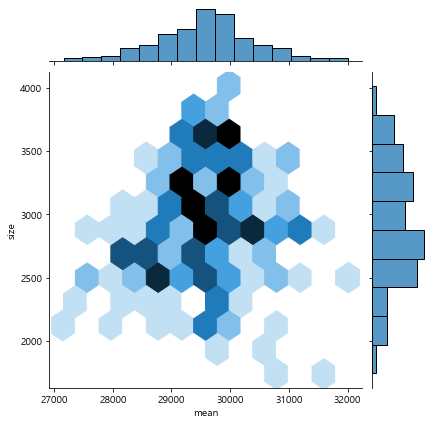

In [29]:
import seaborn as sns
hexbin = sns.jointplot(x= 'mean', y = 'size', data = store_clustering, kind = 'hex')

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
store_clustering_sc = sc.fit_transform(store_clustering)

In [32]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
clusters = kmeans.fit(store_clustering_sc)
store_clustering['cluster'] = clusters.labels_
print(store_clustering['cluster'].unique())
store_clustering.head()

[1 0 2 3]


,size,mean,median,max,min,cluster
0,2879,31295.953456,30500,51000,18570,1
1,2290,29912.462882,27320,51000,6980,0
2,3776,29462.039195,28080,51000,6980,0
3,1743,30743.878371,28770,47440,18990,1
4,2758,28467.396664,27910,47440,6980,2


In [33]:
store_clustering.columns = ['월 건수', '월 평균값', '월 중앙값',
                            '월 최댓값', '월 최솟값', 'cluster']
store_clustering.groupby('cluster').count()

,월 건수,월 평균값,월 중앙값,월 최댓값,월 최솟값
cluster,,,,,
0,91,91,91,91,91
1,14,14,14,14,14
2,67,67,67,67,67
3,24,24,24,24,24


In [34]:
store_clustering.groupby('cluster').mean()

,월 건수,월 평균값,월 중앙값,월 최댓값,월 최솟값
cluster,,,,,
0,3263.967033,29673.335288,27967.032967,50765.274725,7403.736264
1,2513.642857,30717.437262,28804.285714,48965.714286,18820.714286
2,2611.850746,28852.089951,27268.955224,47513.582090,7447.611940
3,2801.208333,30637.966387,30085.416667,50236.666667,7582.500000


In [35]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 0)
x = tsne.fit_transform(store_clustering_sc)

In [36]:
tsne_df = pd.DataFrame(x)
tsne_df['cluster'] = store_clustering['cluster']
tsne_df.columns = ['axis_0', 'axis_1', 'cluster']
tsne_df.head()

,axis_0,axis_1,cluster
0,1.637268,-1.748761,1
1,-1.059481,7.679613,0
2,-11.750683,10.733142,0
3,3.146960,-3.952779,1
4,11.892724,-12.171219,2


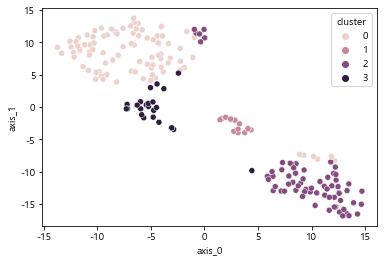

In [37]:
tsne_graph = sns.scatterplot(x = 'axis_0', y = 'axis_1', hue = 'cluster', data = tsne_df)